In [1]:
import pandas as pd
import numpy as np

# Veri oluşturma
np.random.seed(0)  # Reprodüksiyon için

store_values = np.random.choice([1, 2, 3, 4, 5], size=1000)  # 1-5 arasında random store
type_values = np.random.choice(['A', 'B', 'C'], size=1000)  # A, B, C random type
department_values = np.random.choice([1, 2, 3, 4, 5], size=1000)  # 1-5 random department
date_values = pd.date_range(start='2010-01-01', periods=1000, freq='W')  # Haftalık tarih aralığı
weekly_sales_values = np.random.uniform(1000, 50000, size=1000)  # 1000-50000 arasında satış
is_holiday_values = np.random.choice([True, False], size=1000)  # Rasgele tatil durumu
temperature_values = np.random.uniform(-10, 40, size=1000)  # -10 ile 40 arasında sıcaklık
fuel_price_values = np.random.uniform(0.5, 1.5, size=1000)  # 0.5 ile 1.5 arasında akaryakıt fiyatı
unemployment_values = np.random.uniform(3, 12, size=1000)  # 3 ile 12 arasında işsizlik oranı

# DataFrame oluşturma
sales = pd.DataFrame({
    "store": store_values,
    "type": type_values,
    "department": department_values,
    "date": date_values,
    "weekly_sales": weekly_sales_values,
    "is_holiday": is_holiday_values,
    "temperature_c": temperature_values,
    "fuel_price_usd_per_l": fuel_price_values,
    "unemployment": unemployment_values
})

# DataFrame'i görüntüleme
sales

,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,5,A,3,2010-01-03,37040.498308,False,35.275816,1.038516,6.257899
1,1,C,5,2010-01-10,30883.317144,False,33.244339,0.779353,11.702501
2,4,A,4,2010-01-17,47566.474283,True,-9.435496,0.891778,10.547248
3,4,B,1,2010-01-24,35867.008407,False,21.208207,1.405705,8.511472
4,4,B,4,2010-01-31,23367.159744,False,21.769775,0.526335,7.342813
...,...,...,...,...,...,...,...,...,...
995,5,B,3,2029-01-28,29066.159488,False,21.032925,0.573713,7.920902
996,4,C,2,2029-02-04,26889.163607,False,14.390994,1.333587,9.572462
997,2,B,5,2029-02-11,1319.355888,True,0.769574,0.991669,7.587948
998,2,B,1,2029-02-18,37936.850719,False,-5.377722,0.638262,4.662822


In [2]:
# 1. Mağaza("store" ve mağaza tipi "type"  çiftlerinden tekrar edenleri kaldır
# Amaç: Her mağaza için sadece bir tane mağaza tipi bırakmak.
# Neden? Eğer bir mağazanın birden fazla kez farklı zamanlarda listelendiği durumlar varsa, 
# gereksiz tekrarları kaldırıp eşsiz (unique) mağaza-tip kombinasyonlarını alıyoruz.

# Drop duplicate store/type combinations
store_types = sales.drop_duplicates(subset=["store", "type"])
store_types

# Return olarak cikan listede her store ve departman combinasyonisadece birdefa cikar,

,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,5,A,3,2010-01-03,37040.498308,False,35.275816,1.038516,6.257899
1,1,C,5,2010-01-10,30883.317144,False,33.244339,0.779353,11.702501
2,4,A,4,2010-01-17,47566.474283,True,-9.435496,0.891778,10.547248
3,4,B,1,2010-01-24,35867.008407,False,21.208207,1.405705,8.511472
5,2,C,5,2010-02-07,16761.038231,False,39.554461,0.582723,11.655770
7,3,C,4,2010-02-21,43810.356762,False,16.987551,0.686103,7.615037
8,5,C,4,2010-02-28,36421.571756,True,-0.894528,1.332214,4.379432
10,1,B,4,2010-03-14,4684.965657,False,30.992237,0.609416,6.399375
12,3,A,4,2010-03-28,20916.664560,False,-9.291564,1.461589,6.730016
13,2,B,3,2010-04-04,48164.575228,True,20.568043,0.676631,3.195002


In [3]:
# 2. Mağaza ("store" ve departman "department"  çiftlerinden tekrar edenleri kaldır
# Amaç: Mağaza ve departman kombinasyonlarını eşsiz hale getirmek.
# Neden? Eğer bir mağazanın aynı departmanı birden fazla satırda görünüyorsa 
# (farklı zaman dilimlerinde), bunu tek bir satır olarak almak istiyoruz.

######## KODU SOYLE YAZILIR 
# Drop duplicate store/department combinations

store_depts = sales.drop_duplicates(subset=["store", "department"])
store_depts


# Sonuc olarak , Magaza ve departman kombinasyonlarini sadece bir defa cikarir. (5 store, 5 departman = 25 kombinasyon)
# Mağaza ve departman bazında eşsiz kombinasyonlar çıkarılıyor.

,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,5,A,3,2010-01-03,37040.498308,False,35.275816,1.038516,6.257899
1,1,C,5,2010-01-10,30883.317144,False,33.244339,0.779353,11.702501
2,4,A,4,2010-01-17,47566.474283,True,-9.435496,0.891778,10.547248
3,4,B,1,2010-01-24,35867.008407,False,21.208207,1.405705,8.511472
5,2,C,5,2010-02-07,16761.038231,False,39.554461,0.582723,11.655770
6,4,B,3,2010-02-14,10246.562946,False,24.425587,1.320062,11.605465
7,3,C,4,2010-02-21,43810.356762,False,16.987551,0.686103,7.615037
8,5,C,4,2010-02-28,36421.571756,True,-0.894528,1.332214,4.379432
9,1,C,1,2010-03-07,48925.866765,False,3.202099,1.124852,7.798974
10,1,B,4,2010-03-14,4684.965657,False,30.992237,0.609416,6.399375


In [4]:
# 3. Tatil haftalarını seç ve tekrar eden tarihleri kaldır
# Amaç: is_holiday == True olan haftaları alıp benzersiz (unique) tatil tarihlerini bulmak.
# Neden? Tatil dönemleri genellikle birkaç mağazada tekrar edebilir, 
# ancak bize sadece tatil tarihlerinin listesi yeterlidir.
# Subset the rows where is_holiday is True and drop duplicate dates

##### KODU SOYLE YAZILIR
holiday_dates = sales[sales["is_holiday"]].drop_duplicates(subset="date")
holiday_dates

#### Sonuc olarak : Tatil haftaları bulunup, tekrar eden tarihler kaldırılıyor.
# Sadece tatil günlerinin tarihi listeleniyor.

,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
2,4,A,4,2010-01-17,47566.474283,True,-9.435496,0.891778,10.547248
8,5,C,4,2010-02-28,36421.571756,True,-0.894528,1.332214,4.379432
11,5,A,2,2010-03-21,16421.478857,True,-6.521251,0.834281,9.596086
13,2,B,3,2010-04-04,48164.575228,True,20.568043,0.676631,3.195002
14,1,A,2,2010-04-11,29948.542608,True,23.806875,0.913436,10.329297
...,...,...,...,...,...,...,...,...,...
989,3,A,5,2028-12-17,35013.221914,True,8.932282,0.807560,11.988529
990,3,C,1,2028-12-24,45412.276360,True,-2.665311,1.255378,7.846439
992,3,B,5,2029-01-07,6327.209019,True,19.739498,1.361039,11.908361
994,3,A,4,2029-01-21,4886.785237,True,17.028522,1.105759,6.853296


In [5]:
# Counting categorical variables
# Counting is a great way to get an overview of your data and to 
# spot curiosities that you might not notice otherwise. 
# In this exercise, you'll count the number of each type of store and the 
# number of each department number using the DataFrames you created in the previous exercise:

# Drop duplicate store/type combinations
# store_types = sales.drop_duplicates(subset=["store", "type"])

# Drop duplicate store/department combinations
# store_depts = sales.drop_duplicates(subset=["store", "department"])
# The store_types and store_depts DataFrames you created in the last exercise are available, and pandas is imported as pd.

# Instructions

# Count the number of stores of each store type in store_types.
# Count the proportion of stores of each store type in store_types.
# Count the number of stores of each department in store_depts, sorting the counts in descending order.
# Count the proportion of stores of each department in store_depts, sorting the proportions in descending


# Count the number of stores of each type
store_counts = sales.drop_duplicates(subset="store")
store_counts["store"].value_counts()
sales["store"].value_counts(sort=True)
sales["store"].value_counts(normalize=True)

store
4    0.221
1    0.199
2    0.197
3    0.192
5    0.191
Name: proportion, dtype: float64

In [6]:
store_counts["store"].value_counts()


store
5    1
1    1
4    1
2    1
3    1
Name: count, dtype: int64

In [7]:
store_counts = sales["store"].value_counts()

print(store_counts)

store
4    221
1    199
2    197
3    192
5    191
Name: count, dtype: int64


In [8]:
# Get the proportion of stores of each type
store_props = store_types["type"].value_counts(normalize=True)

print(store_props)

type
A    0.333333
C    0.333333
B    0.333333
Name: proportion, dtype: float64


In [9]:
# Count the number of stores for each department and sort
dept_counts_sorted = store_depts["department"].value_counts(sort=True)
print(dept_counts_sorted)

department
3    5
5    5
4    5
1    5
2    5
Name: count, dtype: int64


In [10]:
# Get the proportion of stores in each department and sort
dept_props_sorted = store_depts["department"].value_counts(sort=True, normalize=True)
print(dept_props_sorted)

department
3    0.2
5    0.2
4    0.2
1    0.2
2    0.2
Name: proportion, dtype: float64


In [11]:
sales

,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,5,A,3,2010-01-03,37040.498308,False,35.275816,1.038516,6.257899
1,1,C,5,2010-01-10,30883.317144,False,33.244339,0.779353,11.702501
2,4,A,4,2010-01-17,47566.474283,True,-9.435496,0.891778,10.547248
3,4,B,1,2010-01-24,35867.008407,False,21.208207,1.405705,8.511472
4,4,B,4,2010-01-31,23367.159744,False,21.769775,0.526335,7.342813
...,...,...,...,...,...,...,...,...,...
995,5,B,3,2029-01-28,29066.159488,False,21.032925,0.573713,7.920902
996,4,C,2,2029-02-04,26889.163607,False,14.390994,1.333587,9.572462
997,2,B,5,2029-02-11,1319.355888,True,0.769574,0.991669,7.587948
998,2,B,1,2029-02-18,37936.850719,False,-5.377722,0.638262,4.662822


In [12]:
sales_by_type = sales.groupby("type")["weekly_sales"].sum()

In [13]:
print(sales_by_type)

type
A    8.380394e+06
B    8.631497e+06
C    8.458872e+06
Name: weekly_sales, dtype: float64


In [14]:
sales.pivot_table(values= "weekly_sales" , index ="type").round(0)

,weekly_sales
type,
A,25472.0
B,24803.0
C,26188.0


In [15]:
# Group by 'type' and 'is_holiday', and calculate the total 'weekly_sales' for each group
sales_by_type_is_holiday = sales.groupby(['type', 'is_holiday'])['weekly_sales'].sum()

# Print the result
print(sales_by_type_is_holiday)


type  is_holiday
A     False         3.786833e+06
      True          4.593561e+06
B     False         4.491406e+06
      True          4.140091e+06
C     False         4.000211e+06
      True          4.458661e+06
Name: weekly_sales, dtype: float64


In [16]:
# For each store type, aggregate weekly_sales: get min, max, mean, and median
sales_stats = sales.groupby('type')['weekly_sales'].agg(['min', 'max', 'mean', 'median'])

In [17]:
sales_stats = sales_stats.astype(int)
sales_stats

,min,max,mean,median
type,,,,
A,1087,49923,25472,25473
B,1158,49619,24803,24987
C,1357,49971,26188,25119


In [18]:
sales_stats = sales_stats.round(0)
sales_stats

,min,max,mean,median
type,,,,
A,1087,49923,25472,25473
B,1158,49619,24803,24987
C,1357,49971,26188,25119


In [19]:
unemp_fuel_stats = sales.groupby('type')[['unemployment', 'fuel_price_usd_per_l']].agg(['min', 'max', 'mean', 'median'])

In [20]:
unemp_fuel_stats = unemp_fuel_stats.round(2)
unemp_fuel_stats

unemployment                     fuel_price_usd_per_l                   
              min    max  mean median                  min   max  mean median
type                                                                         
A            3.02  11.99  7.52   7.60                  0.5  1.49  1.05   1.07
B            3.02  11.94  7.36   7.26                  0.5  1.50  1.02   1.03
C            3.02  12.00  7.42   7.38                  0.5  1.50  1.00   0.99

In [21]:
# For each store type, aggregate weekly_sales: get min, max, mean, and median
sales_stats = sales.groupby('type')['weekly_sales'].agg([np.min, np.max, np.mean, np.median])

# Print sales_stats
sales_stats

C:\Users\melih\AppData\Local\Temp\ipykernel_9540\1113889977.py:2: FutureWarning: The provided callable <function min at 0x000002336CCF3240> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  sales_stats = sales.groupby('type')['weekly_sales'].agg([np.min, np.max, np.mean, np.median])
C:\Users\melih\AppData\Local\Temp\ipykernel_9540\1113889977.py:2: FutureWarning: The provided callable <function max at 0x000002336CCF3100> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  sales_stats = sales.groupby('type')['weekly_sales'].agg([np.min, np.max, np.mean, np.median])
C:\Users\melih\AppData\Local\Temp\ipykernel_9540\1113889977.py:2: FutureWarning: The provided callable <function mean at 0x000002336CCF3B00> is currently using SeriesGroupBy.mean. In a fut

,min,max,mean,median
type,,,,
A,1087.318821,49923.758177,25472.321875,25473.074820
B,1158.851122,49619.929275,24803.152004,24987.107999
C,1357.072657,49971.895226,26188.458558,25119.112222


In [22]:
# For each store type, aggregate unemployment and fuel_price_usd_per_l: get min, max, mean, and median
unemp_fuel_stats = sales.groupby('type')[['unemployment', 'fuel_price_usd_per_l']].agg([np.min, np.max, np.mean, np.median])
unemp_fuel_stats 

C:\Users\melih\AppData\Local\Temp\ipykernel_9540\1535456313.py:2: FutureWarning: The provided callable <function min at 0x000002336CCF3240> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  unemp_fuel_stats = sales.groupby('type')[['unemployment', 'fuel_price_usd_per_l']].agg([np.min, np.max, np.mean, np.median])
C:\Users\melih\AppData\Local\Temp\ipykernel_9540\1535456313.py:2: FutureWarning: The provided callable <function max at 0x000002336CCF3100> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  unemp_fuel_stats = sales.groupby('type')[['unemployment', 'fuel_price_usd_per_l']].agg([np.min, np.max, np.mean, np.median])
C:\Users\melih\AppData\Local\Temp\ipykernel_9540\1535456313.py:2: FutureWarning: The provided callable <function mean at 0x000

unemployment                                fuel_price_usd_per_l  \
              min        max      mean    median                  min   
type                                                                    
A        3.020312  11.988529  7.516757  7.603811             0.504069   
B        3.022663  11.938768  7.360143  7.264710             0.501991   
C        3.018511  11.998331  7.421335  7.377204             0.500947   

                                    
           max      mean    median  
type                                
A     1.494756  1.048192  1.071834  
B     1.499120  1.021973  1.032527  
C     1.497600  0.999313  0.993974

In [23]:
# Pivot for mean weekly_sales for each store type
mean_sales_by_type = sales.pivot_table(values= "weekly_sales", index="type")

In [24]:
mean_sales_by_type

,weekly_sales
type,
A,25472.321875
B,24803.152004
C,26188.458558


In [25]:
# Pivot table for mean and median of 'weekly_sales' for each 'type'
mean_med_sales_by_type = sales.pivot_table(values="weekly_sales", index="type", aggfunc=["mean", "median"])

# Print the result
mean_med_sales_by_type.round(0)


,mean,median
,weekly_sales,weekly_sales
type,,
A,25472.0,25473.0
B,24803.0,24987.0
C,26188.0,25119.0


In [26]:
# Pivot for mean weekly_sales by store type and holiday 


mean_sales_by_type_holiday = sales.pivot_table(values="weekly_sales", index="type", columns="is_holiday")
# Print mean_sales_by_type_holiday
mean_sales_by_type_holiday.round(0)

is_holiday,False,True
type,,
A,24120.0,26707.0
B,25519.0,24070.0
C,24846.0,27523.0


In [27]:
# Print mean weekly_sales by department and type; fill missing values with 0


print(sales.pivot_table(values="weekly_sales", index="type", columns ="department"))


# Null data lari istemiyorsak. 
sales.pivot_table(values="weekly_sales", index="type", columns ="department")


department             1             2             3             4  \
type                                                                 
A           26406.779375  25014.128692  24166.452742  27888.755679   
B           23087.547014  26347.117837  22403.992647  28678.025922   
C           27661.263088  27688.047589  24239.912001  23888.560566   

department             5  
type                      
A           22736.519467  
B           23106.334237  
C           27529.217188  


department,1,2,3,4,5
type,,,,,
A,26406.779375,25014.128692,24166.452742,27888.755679,22736.519467
B,23087.547014,26347.117837,22403.992647,28678.025922,23106.334237
C,27661.263088,27688.047589,24239.912001,23888.560566,27529.217188


In [28]:

# Use pivot_table to calculate mean weekly_sales by department and type
sales.pivot_table(values="weekly_sales", index="department", columns="type", fill_value=0)

type,A,B,C
department,,,
1,26406.779375,23087.547014,27661.263088
2,25014.128692,26347.117837,27688.047589
3,24166.452742,22403.992647,24239.912001
4,27888.755679,28678.025922,23888.560566
5,22736.519467,23106.334237,27529.217188


In [29]:
# Print the mean weekly_sales by department and type; fill missing values with 0s; sum all rows and cols
print(sales.pivot_table(values="weekly_sales", index="department", columns="type", fill_value=0, margins=True))


type                   A             B             C           All
department                                                        
1           26406.779375  23087.547014  27661.263088  25726.416744
2           25014.128692  26347.117837  27688.047589  26477.094177
3           24166.452742  22403.992647  24239.912001  23500.565186
4           27888.755679  28678.025922  23888.560566  26953.475072
5           22736.519467  23106.334237  27529.217188  24367.139688
All         25472.321875  24803.152004  26188.458558  25470.762909


In [30]:
print(sales["date"].min())

2010-01-03 00:00:00


In [31]:
print(sales["date"].max())

2029-02-25 00:00:00


In [32]:
((sales["date"].max()-sales["date"].min()))

Timedelta('6993 days 00:00:00')

In [34]:
sales.head()

,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,5,A,3,2010-01-03,37040.498308,False,35.275816,1.038516,6.257899
1,1,C,5,2010-01-10,30883.317144,False,33.244339,0.779353,11.702501
2,4,A,4,2010-01-17,47566.474283,True,-9.435496,0.891778,10.547248
3,4,B,1,2010-01-24,35867.008407,False,21.208207,1.405705,8.511472
4,4,B,4,2010-01-31,23367.159744,False,21.769775,0.526335,7.342813


In [35]:
print(sales.keys())

Index(['store', 'type', 'department', 'date', 'weekly_sales', 'is_holiday',
       'temperature_c', 'fuel_price_usd_per_l', 'unemployment'],
      dtype='object')


In [50]:
sales.pivot_table(values="weekly_sales", index ="store", columns ="department", fill_value =0, margins=True).round(2)

department,1,2,3,4,5,All
store,,,,,,
1,27115.16,25110.97,19310.26,27821.41,21902.99,24683.11
2,25415.66,28810.73,25520.77,25906.19,26730.85,26455.95
3,23166.49,28429.53,22948.68,25680.98,22915.13,24809.28
4,27382.90,25465.10,22541.34,27818.10,24140.03,25696.66
5,24687.06,24200.65,26888.24,27107.96,25340.17,25678.84
All,25726.42,26477.09,23500.57,26953.48,24367.14,25470.76


In [66]:
sales.groupby(['store', 'department'])['weekly_sales'].sum().round(2).sort_values().apply(lambda x: "{:,.2f}".format(x))

store  department
3      5               687,453.82
1      3               695,169.50
5      1               740,611.67
1      2               753,329.22
       5               766,604.50
3      1               833,993.80
4      3               856,570.80
3      3               894,998.67
5      2               895,423.99
2      1               914,963.78
4      5               965,601.37
5      3               967,976.60
2      5             1,042,503.13
       4             1,062,153.76
5      4             1,084,318.52
2      2             1,094,807.58
4      2             1,094,999.16
2      3             1,097,392.94
1      1             1,138,836.75
3      2             1,165,610.85
       4             1,181,324.89
5      5             1,216,328.00
4      1             1,259,613.18
       4             1,502,177.58
1      4             1,557,998.84
Name: weekly_sales, dtype: object

In [69]:
# En çok satış yapan mağazayı bulma
top_store_sales = sales.groupby(['store', 'department'])['weekly_sales'].sum().round(2).sort_values(ascending=False).head(1)

# Sonucu yazdır
print(top_store_sales)


store  department
1      4             1557998.84
Name: weekly_sales, dtype: float64


In [71]:


# 'store' sütununda eksik (null) değerlerin sayısını kontrol etme
null_stores = sales['store'].isnull().sum()

# Sonucu yazdır
print(f"Null values in 'store' column: {null_stores}")



Null values in 'store' column: 0


In [73]:
#(Eğer Null values in 'store' column: 0 şeklinde bir çıktı aldıysanız, bu durumda store sütununda null (eksik) 
#değerlerin olmadığını, yani tüm store değerlerinin mevcut olduğunu görebiliyoruz.

#Ancak, veri örneğinize baktığımızda, bazı store değerlerinin eksik gibi görünmesine rağmen null değeri olmaması, şunlara işaret ediyor olabilir:

# Boş veya "NaN" Olmayan Ancak Geçersiz Veriler: Bazen veri "eksik" gibi görünebilir 
# ama aslında boş bir string ("") ya da başka bir geçersiz değerle doldurulmuş olabilir. 
# Bu tür veriler isnull() ile tespit edilmezler, çünkü NaN (null) değil, sadece geçersiz veya eksik olabilirler)

# 'store' sütununda boş string olanları kontrol etme
empty_stores = sales[sales['store'] == '']

# Sonucu yazdır
print(f"Empty stores: {empty_stores}")

# 'store' sütununda hem NaN hem de boş string olanları kontrol etme
invalid_stores = sales[sales['store'].isnull() | (sales['store'] == '')]

# Sonucu yazdır
print(f"Invalid stores: {invalid_stores}")




Empty stores: Empty DataFrame
Columns: [store, type, department, date, weekly_sales, is_holiday, temperature_c, fuel_price_usd_per_l, unemployment]
Index: []
Invalid stores: Empty DataFrame
Columns: [store, type, department, date, weekly_sales, is_holiday, temperature_c, fuel_price_usd_per_l, unemployment]
Index: []


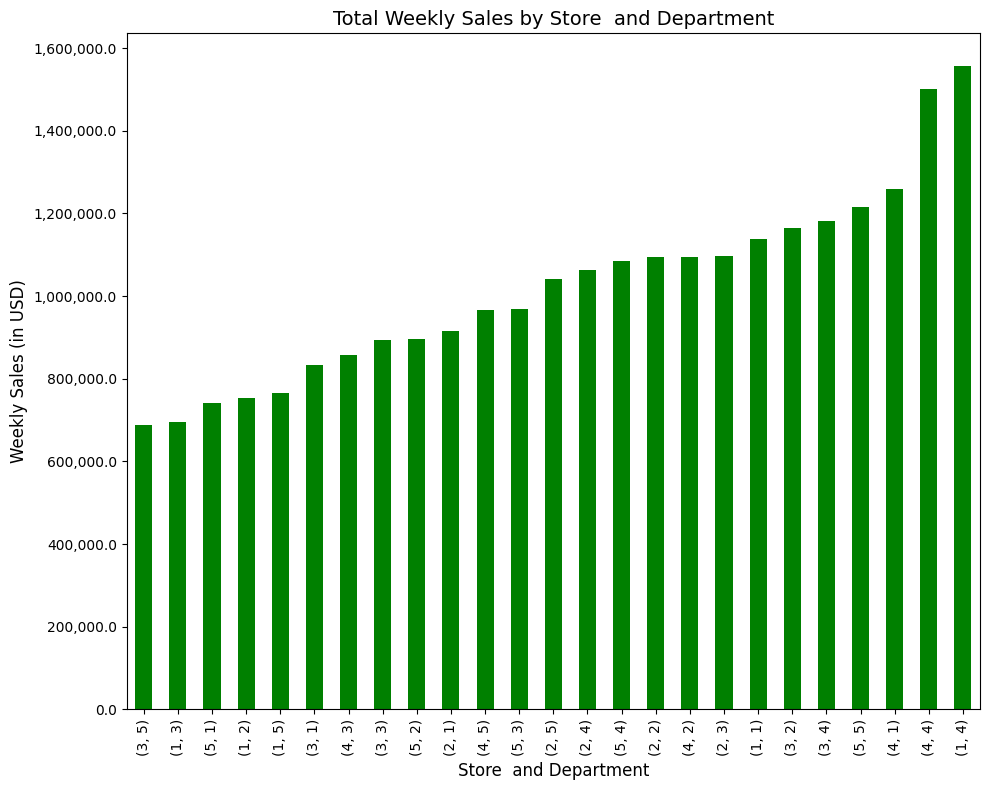

In [68]:
import matplotlib.pyplot as plt

# Veri hazırlığı
Haftalik_Satis = sales.groupby(['store', 'department'])['weekly_sales'].sum().round(2).sort_values()

# Çubuk grafiği oluştur
fig, ax = plt.subplots(figsize=(10, 8))

# Negatif değerler kırmızı, pozitif değerler yeşil renk olacak şekilde ayarla
colors = Haftalik_Satis.apply(lambda x: 'green' if x > 0 else 'red')

# Çubuk grafiği çiz
Haftalik_Satis.plot(kind='bar', ax=ax, color=colors)

# Başlık ve etiketler
ax.set_title('Total Weekly Sales by Store  and Department', fontsize=14)
ax.set_xlabel('Store  and Department', fontsize=12)
ax.set_ylabel('Weekly Sales (in USD)', fontsize=12)

# Y ekseninde 1000 ayracı ve yuvarlama
plt.tick_params(axis='y', labelsize=10)
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(x)))

# Grafik gösterimi
plt.tight_layout()
plt.show()


In [75]:
sales.describe()

,store,department,date,weekly_sales,temperature_c,fuel_price_usd_per_l,unemployment
count,1000.000000,1000.000000,1000,1000.000000,1000.000000,1000.000000,1000.000000
mean,3.008000,3.052000,2019-07-31 12:00:00,25470.762909,15.032723,1.023280,7.431434
min,1.000000,1.000000,2010-01-03 00:00:00,1087.318821,-9.959369,0.500947,3.018511
25%,2.000000,2.000000,2014-10-17 06:00:00,13408.742775,2.602097,0.764658,5.361836
50%,3.000000,3.000000,2019-07-31 12:00:00,25152.334947,15.674962,1.029838,7.412851
75%,4.000000,4.000000,2024-05-13 18:00:00,37973.695407,27.734105,1.296473,9.481893
max,5.000000,5.000000,2029-02-25 00:00:00,49971.895226,39.994865,1.499120,11.998331
std,1.407095,1.397587,NaN,14277.905931,14.422506,0.297290,2.494700


<Axes: xlabel='temperature_c', ylabel='fuel_price_usd_per_l'>

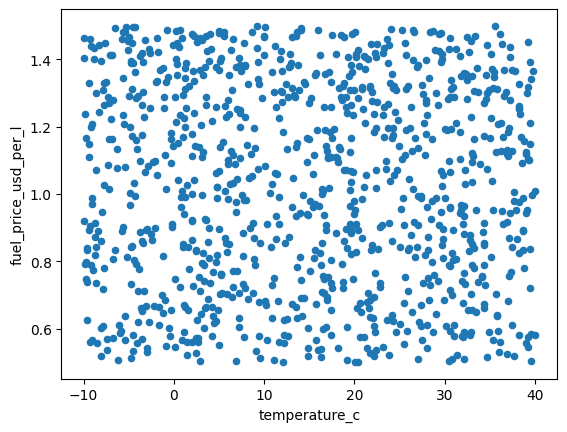

In [90]:
sales.plot(x="temperature_c", y="fuel_price_usd_per_l", kind="scatter")